5 a)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Python 3.10.12 (main, Mar 22 2024, 16:50:05) [GCC 11.4.0]
Type 'copyright', 'credits' or 'license' for more information
IPython 7.34.0 -- An enhanced Interactive Python. Type '?' for help.

In [1]: from matplotlib.image import imread

In [2]: import matplotlib.pyplot as plt

In [3]: A = imread('/content/drive/MyDrive/cs229/problem-sets/PS3/data/peppers-large.tiff')

In [4]: plt.imshow(A)
Out[4]: <matplotlib.image.AxesImage at 0x7ccfdcc02230>

In [5]: plt.show()


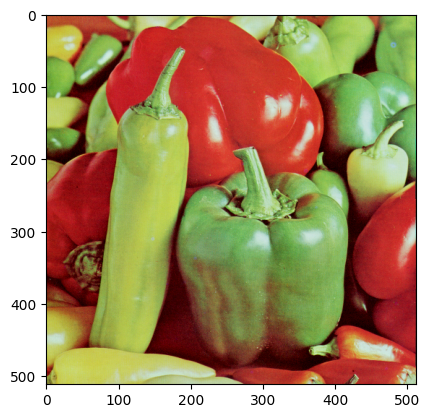

KeyboardInterrupt: Interrupted by user

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from IPython.terminal.embed import InteractiveShellEmbed
# Launch the interactive shell
InteractiveShellEmbed()()

# from matplotlib.image import imread
# import matplotlib.pyplot as plt
# A = imread('/content/drive/MyDrive/cs229/problem-sets/PS3/data/peppers-large.tiff')
# plt.imshow(A)
# plt.show()
# A = imread('/content/drive/MyDrive/cs229/problem-sets/PS3/data/peppers-small.tiff')
# plt.imshow(A)
# plt.show()

Python 3.10.12 (main, Mar 22 2024, 16:50:05) [GCC 11.4.0]
Type 'copyright', 'credits' or 'license' for more information
IPython 7.34.0 -- An enhanced Interactive Python. Type '?' for help.

In [1]: from matplotlib.image import imread

In [2]: import matplotlib.pyplot as plt

In [3]: A = imread('/content/drive/MyDrive/cs229/problem-sets/PS3/data/peppers-small.tiff')

In [4]: A = imread('/content/drive/MyDrive/cs229/problem-sets/PS3/data/peppers-small.tiff')

In [5]: plt.show()

In [6]: plt.imshow(A)
Out[6]: <matplotlib.image.AxesImage at 0x7ccfdcb648e0>

In [7]: plt.show()


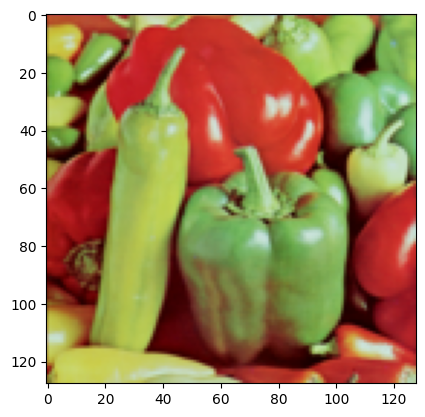

KeyboardInterrupt: Interrupted by user

In [ ]:
from IPython.terminal.embed import InteractiveShellEmbed
# Launch the interactive shell
InteractiveShellEmbed()()

# from matplotlib.image import imread
# import matplotlib.pyplot as plt
# A = imread('/content/drive/MyDrive/cs229/problem-sets/PS3/data/peppers-small.tiff')
# plt.imshow(A)
# plt.show()

In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
A = imread('/content/drive/MyDrive/cs229/problem-sets/PS3/data/peppers-small.tiff')
image_array = np.array(A)

In [ ]:
print(image_array.shape)
print(image_array[1,1,:])

(128, 128, 3)
[187  85  46]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
number of iterations=50


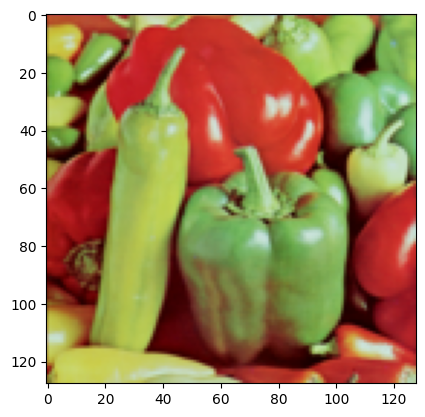

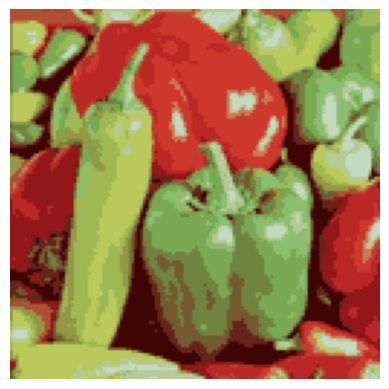

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np


def train(x, k):
  """ finds the k clusters by running k-means algorithm
  Args:
    x: data matrix of shape (..., n)
    k: number of clusters
  Returns:
    mu: Numpy array describing cluster centers of shape (k, n)
  """
  x_shape = x.shape
  m = np.prod(x_shape[:-1])
  reshaped_x = x.reshape(m, x_shape[-1])
  # reshaped_x.shape == (m, n)
  """ initialize cluster centroids \mu_1,...,\mu_k randomly """
  random_indices = np.random.choice(m, k, replace=False)
  mu = reshaped_x[random_indices, :]
  # mu.shape == (k, n)
  max_iter = 50
  eps = 1e-3
  it = 0
  J = prev_J = None
  while it < max_iter and (prev_J is None or np.abs(J - prev_J) >= eps):
    """ c^i = argmin_j |x^i-\mu_j| """
    diff = reshaped_x[:, None, :] - mu[None, :, :]
    # diff.shape == (m, k, n)
    distances = np.linalg.norm(diff, axis=-1)
    # distances.shape == (m, k)
    c = np.argmin(distances, axis=1)
    # c.shape == (m,)
    c_elements = np.unique(c)
    c_onehot = (c[:, None] == c_elements).astype(int)
    # c_onehot.shape() == (m, k)
    """ J = \sum_{i=1}^m |x^i-\mu_{c(i)}|^2"""
    diff_to_center = diff * c_onehot[:, :, None]
    # diff_to_center.shape == (m, k, n)
    diff_to_center = np.sum(diff_to_center, axis=1)
    # diff_to_center.shape == (m, n)
    distances_to_center = np.linalg.norm(diff_to_center, axis=-1)
    # distances_to_center.shape == (m,)
    prev_J = J
    J = np.sum(distances_to_center, axis=0)
    """ mu_j = \sum_{i=1}^m 1(c^i=j) x^i/\sum_{i=1}^m 1(c^i=j)"""
    numerator = (c_onehot.T) @ reshaped_x
    # numerator.shape == (k, n)
    denominator = np.sum(c_onehot, axis=0)
    # denominator.shape == (k,)
    mu = numerator / denominator[:, None]
    # mu.shape == (k, n)
    it += 1
  print('number of iterations=' + str(it))
  mu = np.round(mu)
  mu = mu.astype(int)
  return mu

def cluster(x, mu):
  """ replace each sample in x with the value of the cluster center its nearest to
  Args:
    x: data matrix of shape (..., n)
    mu: numpy array of shape (k, n)
  Returns:
    y: data matrix of shape (..., n)
  """
  x_shape = x.shape
  m = np.prod(x_shape[:-1])
  reshaped_x = x.reshape(m, x.shape[-1])
  """ c^i = argmin_j |x^i-\mu_j| """
  diff = reshaped_x[:, None, :] - mu[None, :, :]
  # diff.shape == (m, k, n)
  distances = np.linalg.norm(diff, axis=-1)
  # distances.shape == (m, k)
  c = np.argmin(distances, axis=1)
  # c.shape == (m,)
  c_elements = np.unique(c)
  c_onehot = (c[:, None] == c_elements).astype(int)
  # c_onehot.shape() == (m, k)
  """ y = c_onehot @ mu """
  y = c_onehot @ mu
  # y.shape == (m, n)
  y = y.reshape(x_shape)
  return y


if __name__ == '__main__':
  np.random.seed(229)
  A = imread('/content/drive/MyDrive/cs229/problem-sets/PS3/data/peppers-small.tiff')
  image_array = np.array(A)
  mu = train(image_array, 16)
  B = cluster(image_array, mu)
  plt.imshow(A)
  plt.show()
  plt.imshow(B)
  plt.axis('off')
  plt.show()

5 b)

The original file takes 128 * 128 * 24 bits to transmit. The new file takes 128 * 128 * 4 + 16 * 24 bits to transmit. The compression factor approximately equals 1/6.